In [1]:
import sys; sys.path.insert(0, '../')
import geoplot as gplt
import geoplot.crs as ccrs
import geopandas as gpd
import pandas as pd
import numpy as np
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
cities = gpd.read_file("../data/cities/citiesx010g.shp")

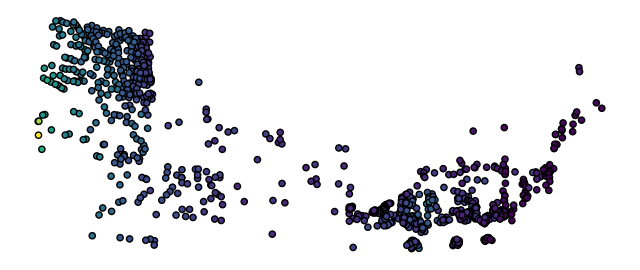

In [12]:
gplt.pointplot(cities.head(1000), projection=ccrs.AlbersEqualArea(), hue='ELEV_IN_FT', k=None, cmap='viridis')

In [16]:
from random import randint
from geoplot import utils
polygons = utils.gaussian_polygons(n=20, points=utils.gaussian_points(n=3000))
polydata = gpd.GeoDataFrame(data={'classification': [randint(1, 20) for _ in range(len(polygons))]}, geometry=polygons)

In [17]:
polydata['latdep'] = polydata['classification'] + np.random.normal() * 5 + 5 + polydata.geometry.envelope.exterior.map(lambda ext: ext.coords[0][1] + ext.coords[0][0])

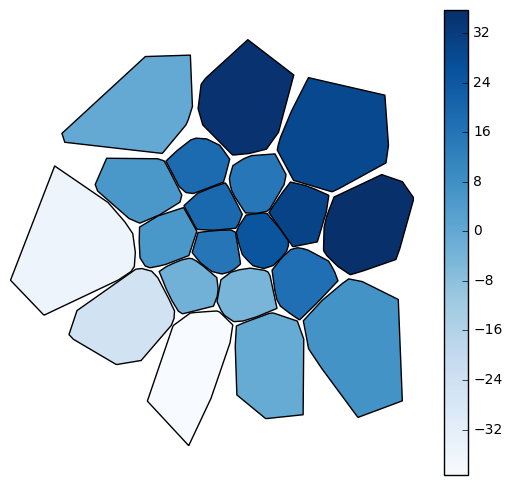

In [22]:
gplt.choropleth(polydata, hue='latdep', cmap='Blues', k=None, legend=True, projection=ccrs.PlateCarree())